In [1]:
using Wavelets, MultivariateStats, Deconvolution

In [2]:
using Plots, Distributions, Random, NPZ

In [3]:
d = Normal(0., 0.1)
rng = MersenneTwister(0)

MersenneTwister(0)

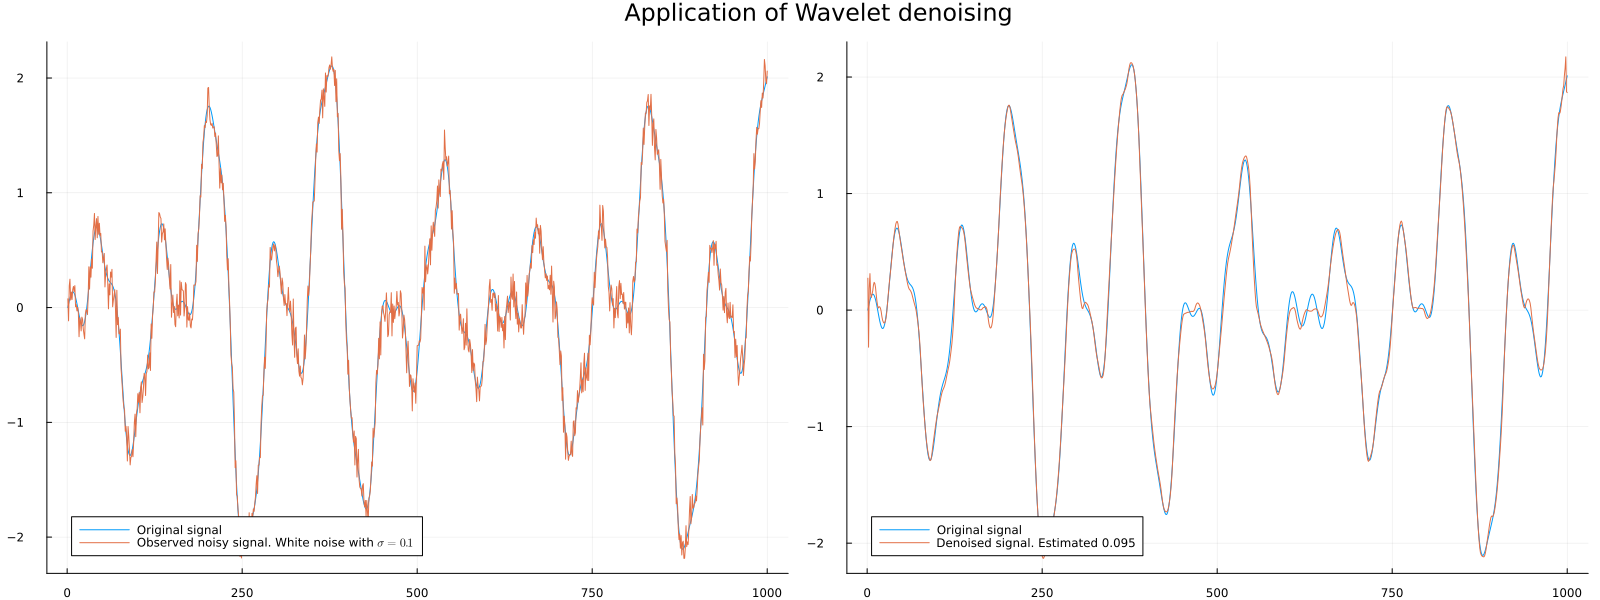

In [6]:
t = range(0, stop=10, length=1000) # observation times
x = sin.(2t) .* cos.(5t) - 1.5cos.(6t) .* sin.(2t) + 0.2.*sin.(20t) # the original signal
n = rand(rng, d, size(x,1)) 

sig_estimate = round(noisest(x+n), digits=3)

p1 = plot(x, label="Original signal ")
p1 = plot!(x+n, label="Observed noisy signal. White noise with \$σ=0.1\$")

p2 = plot(x, label="Original signal")
p2 = plot!(denoise(x+n), label="Denoised signal. Estimated $(sig_estimate)")

plot(p1, p2, layout=(1,2), size=(1600,600))
plot!(plot_title="Application of Wavelet denoising", titlefontsize=16)
#plot!(y_n[2:1000], label="observed noisy signal")
#plot!(z_n[2:1000], label="observed noisy signal")
#savefig("/home/eric/src/master_code/notebooks/Wiener_Deconv_results/wavelet_denoise.png") 

In [8]:
wavelet(WT.sym5, WT.Filter)

OrthoFilter{Wavelets.WT.PerBoundary}([0.019538882735386898, -0.02110183402492983, -0.17532808990810747, 0.016602105764424325, 0.633978963456949, 0.7234076904038076, 0.1993975339769955, -0.03913424930258344, 0.0295194909260734, 0.02733306834516448], "sym5")

In [13]:
wavelet(WT.sym5, WT.Filter).qmf

10-element Vector{Float64}:
  0.019538882735386898
 -0.02110183402492983
 -0.17532808990810747
  0.016602105764424325
  0.633978963456949
  0.7234076904038076
  0.1993975339769955
 -0.03913424930258344
  0.0295194909260734
  0.02733306834516448

In [11]:
WT.Filter

Wavelets.WT.FilterTransform()

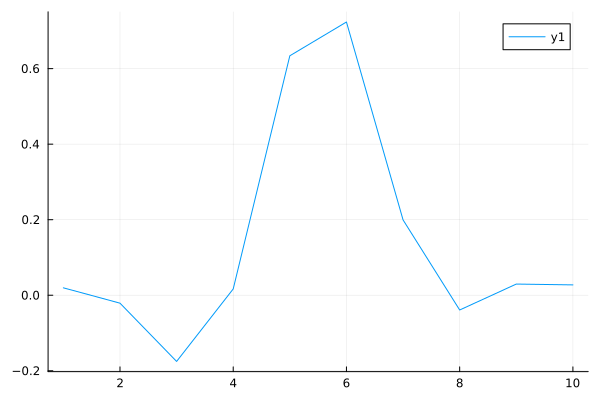

In [14]:
plot(wavelet(WT.sym5, WT.Filter).qmf)

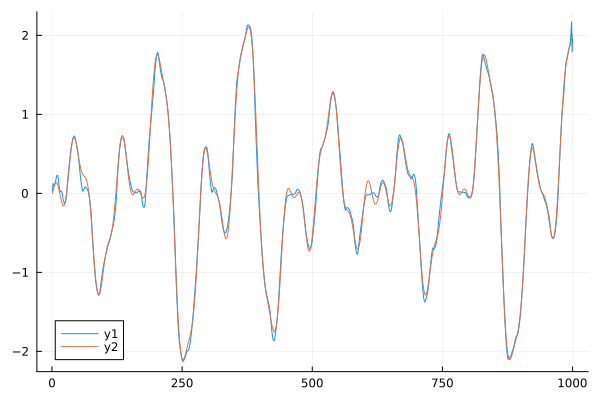

In [33]:
plot(denoise(x+n))
plot!(x)

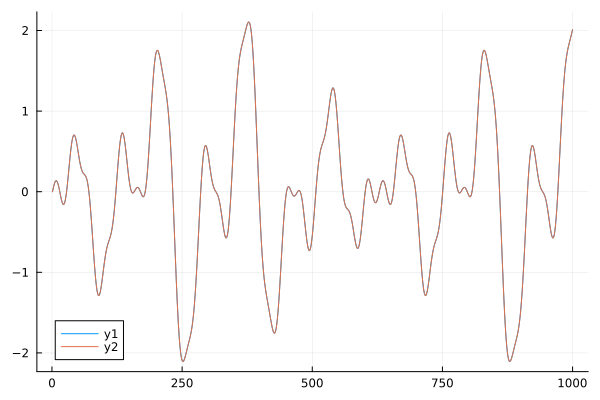

In [18]:
plot(denoise(x))
plot!(x)

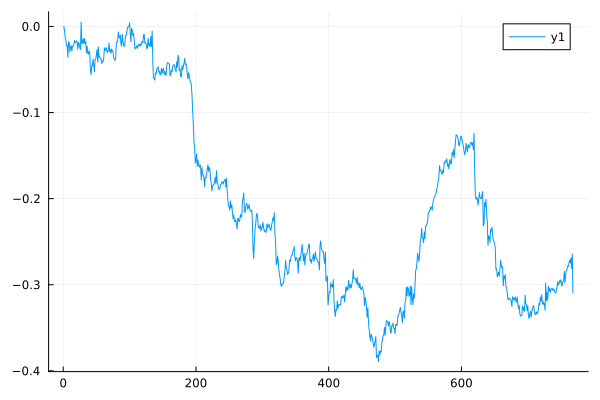

In [37]:
X = Float32.(npzread("/home/eric/src/bptt-julia/example_data/RAM_PLRNN_data_C_009_X28.npy"))
plot(X[:,1])

In [22]:
function spm_Gpdf(x, α, β)
    k = α
    Θ = 1/β
    dist = Gamma(α,Θ)
    return pdf.(dist, x)
end

function spm_hrf(RT)
    p = [6., 16., 1., 1., 6., 0., 32.]
    fMRI_T=16
    
    dt = RT / fMRI_T
    u = (range(0, ceil(Int64,p[7]/dt), step=1) |> collect) .- (p[6]/dt)
    
    hrf = spm_Gpdf(u, p[1]/p[3], dt/p[3]) - spm_Gpdf(u, p[2]/p[4], dt/p[4])/p[5]
    print(range(0, floor(Int64,p[7]/RT)))
    hrf = hrf[range(0, floor(Int64,p[7]/RT))*fMRI_T .+ 1]
    return hrf/sum(hrf)
end

spm_hrf (generic function with 1 method)

In [6]:
X = Float32.(npzread("/home/eric/src/bptt-julia-mri/example_data/patiant_data/C/009/data.npy"))

size(X)

(28, 768)

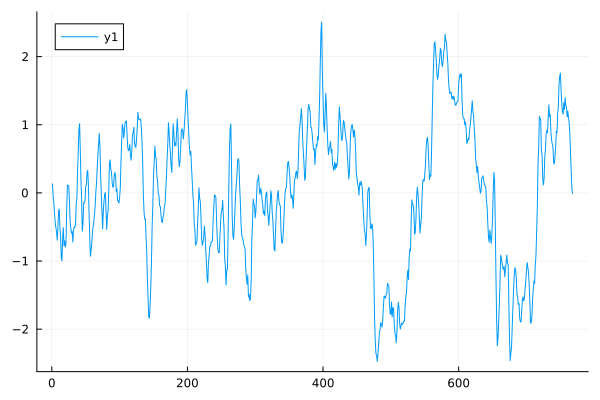

In [30]:
plot(X[1,:])

0:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:170:17

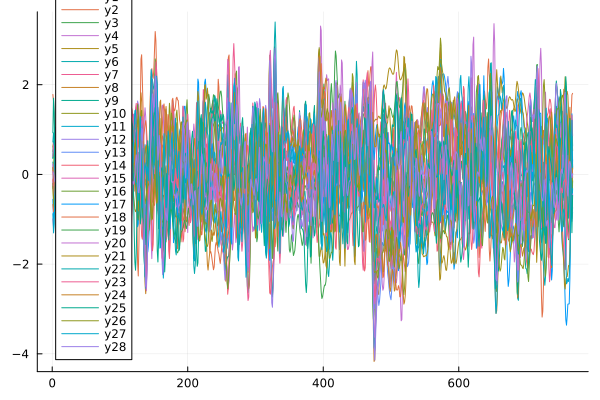

In [37]:
using FillArrays

p = plot()
for i in 1:28
    signal =X[i,:]
    noise = randn(length(signal)) .* noisest(signal)
    denoised_signal = denoise(signal)
    ir = [spm_hrf(1.8); Zeros(size(signal,1) - size(spm_hrf(1.8),1))]
    p = plot!(wiener(signal, denoised_signal, noise, ir))
end

plot(p)

In [14]:
M = fit(PCA, X; maxoutdim=3)

x_pca = predict(M, X)

3×768 Matrix{Float32}:
 0.455282  0.596599  -0.0658152  -0.351908  …  -1.19356  -1.42214   -1.31492
 0.833302  0.810445   1.31473     1.76372      -1.4763   -0.469853   0.297121
 0.158203  0.165668   0.311883    0.401615     -1.96589  -1.46636   -0.635497

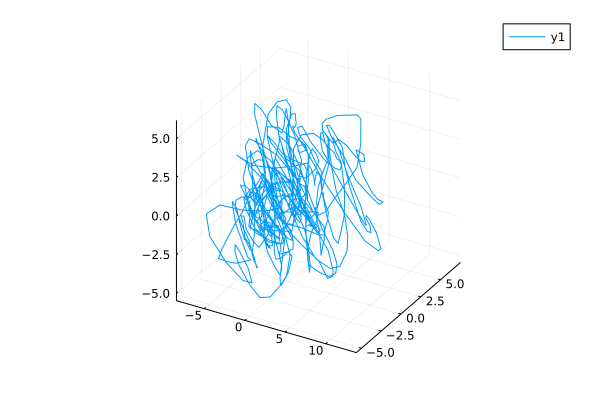

In [15]:
plot(x_pca[1,:], x_pca[2,:], x_pca[3,:])

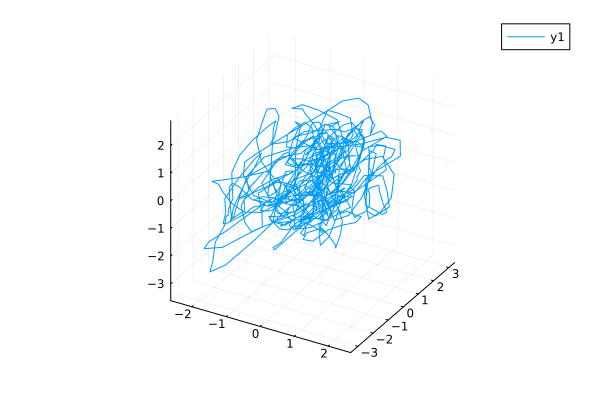

In [18]:
plot(X[1,:], X[2,:], X[3,:])

In [31]:
spm_hrf(1.8)

0:17

18-element Vector{Float64}:
  0.0
  0.056207188456364306
  0.2973098834831926
  0.37307654006484137
  0.2584685333686089
  0.12414268610170952
  0.0361282913836745
 -0.010455184955206667
 -0.030204961716319447
 -0.03337449817837386
 -0.027761952798392907
 -0.019389196715290467
 -0.011869950233212781
 -0.006529192886483998
 -0.0032824787614955642
 -0.0015277676275531349
 -0.0006650031317615002
 -0.0002729358543009163